# Predicting Scores of Students 
Using Study Hours

By Linear Regression - Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.



In [1]:
# Importing Libraries
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Import
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)


In [3]:
print("Successfully we have imported data")
print(student_data)

Successfully we have imported data
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
# Statistical Overview 
print(student_data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


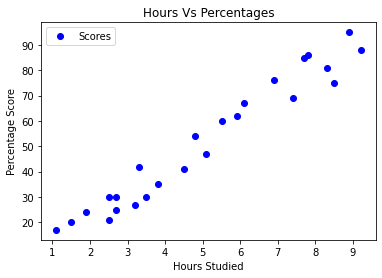

In [5]:
# Plotted Graph to Visualize tha dataset
student_data.plot(x = "Hours", y = "Scores", style = 'bo')
plt.title("Hours Vs Percentages")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [6]:
# prepare the data by extracting values from hour data into X variable and scores in Y variable
X = student_data.iloc[:, :-1].values
Y =student_data.iloc[:,1].values
#number of hours studied
print(X)
#Scores obtained
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [7]:
#split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)
print(X_train,X_test,Y_train,Y_test)


[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]] [76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] [20 27 69 30 62 35 24 86]


In [8]:
#design and train machine learning model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training Complete")

Training Complete


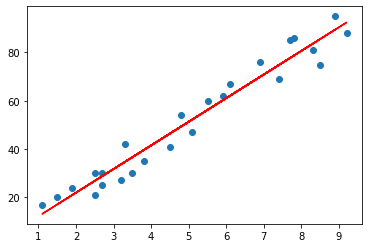

In [9]:
#step  - visualize the model
#regresson line plottting
line = regressor.coef_*X+regressor.intercept_
#test data plotting
plt.scatter(X,Y)
plt.plot(X, line, color = "red")
plt.show()

In [10]:
#step - makje prediction
print(X_test)
Y_pred = regressor.predict(X_test)

#comparing actual vs predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [11]:
#testing with a given data
Hours = 9.25
own_pred = regressor.predict([[Hours]])
print(f"Number of hours = {Hours}")
print (f"Predicted score of that student = {own_pred[0]}")

Number of hours = 9.25
Predicted score of that student = 92.91505723477056
